In [1]:
#Importing necessary libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math

## Importing dataset into Pandas object

In [2]:
# Parsing the target sheet

df = pd.read_csv('/Users/otabekjuraev/OneDrive - Sejong University/DREXEL/Courses/MIS/Week 3/dataset/student_data_csv.csv')



df

,Respondent ID,Work Terms,Class (BOT),College Code,Major Code,Coop Conc,Major Conc,Co-op #,Citizenship Status,learn and focus
0,11,201415-201425,JR,B,FIN,4COP,NaN,Only,US Citizen,Finishing my requirements and focusing on gett...
1,29,201415-201425,SR,B,ACCT,4COP,NaN,Only,US Citizen,(In relation to my Coop) - Branding and Consum...
2,55,201415-201425,JR,B,ACCT,5COP,NaN,Third,US Citizen,Networking and real life applications.
3,61,201425-201425,JR,B,BAE,5COP,NaN,Second,Non US Citizen,I wish to learn more about research skills.
4,60,201415-201415,JR,B,BAE,5COP,NaN,Second,Non US Citizen,I look to learn more on programming itself as ...
...,...,...,...,...,...,...,...,...,...,...
1422,5921,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,In returning to class I would like to focus mo...
1423,5922,201435-201435,JR,B,MKTG,5COP,NaN,First,Non US Citizen,Marketing
1424,5932,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,I would like to continue my math education. It...
1425,5938,201435-201445,PJ,B,GBUS,4COP,NaN,Only,US Citizen,I would like to get to back to focusing more o...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Respondent ID       1427 non-null   int64 
 1   Work Terms          1427 non-null   object
 2   Class (BOT)         1427 non-null   object
 3   College Code        1427 non-null   object
 4   Major Code          1427 non-null   object
 5   Coop Conc           1427 non-null   object
 6   Major Conc          31 non-null     object
 7   Co-op #             1427 non-null   object
 8   Citizenship Status  1427 non-null   object
 9   learn and focus     1425 non-null   object
dtypes: int64(1), object(9)
memory usage: 111.6+ KB


In [4]:
text_data = []

for i in range(len(df)) :
  text_data.append(df.loc[i, "learn and focus"])


In [5]:
len((text_data))

1427

In [6]:
type(text_data[0])

str

## Joining one column into one dataset for cleaning
## Counting unique words in the dataset

In [7]:
new_data = []

for i in text_data:
    some_list = str(i).split()
    for m in some_list:
        new_data.append(m)

    

In [8]:
print(F"Total number of unique words in raw data: {len(new_data)} ")

Total number of unique words in raw data: 34132 


In [9]:
# Printing results sample of 200 items

print(new_data[0:200])

['Finishing', 'my', 'requirements', 'and', 'focusing', 'on', 'getting', 'a', 'job', 'after', 'graduating.', 'Finance', 'major.', '(In', 'relation', 'to', 'my', 'Coop)', '-', 'Branding', 'and', 'Consumer', 'Behavior', 'among', 'other', 'things', 'Networking', 'and', 'real', 'life', 'applications.', 'I', 'wish', 'to', 'learn', 'more', 'about', 'research', 'skills.', 'I', 'look', 'to', 'learn', 'more', 'on', 'programming', 'itself', 'as', 'part', 'of', 'engineering', 'and', 'the', 'field', 'of', 'big', 'data', 'and', 'its', 'visualization', 'technologies.', 'I', 'want', 'to', 'focus', 'on', 'my', 'networking', 'skills.', 'I', 'have', 'made', 'several', 'valuable', 'business', 'connections', 'over', 'these', '6', 'months', 'and', 'would', 'like', 'to', 'continue', 'to', 'market', 'myself', 'through', 'various', 'career', 'fairs,', 'Q/As,', 'etc', 'in', 'order', 'to', 'improve', 'my', 'chances', 'at', 'securing', 'employment', 'come', 'graduation.', 'I', 'want', 'to', 'focus', 'on', 'utiliz

## Converting into lowercase

In [10]:
#Printing results from lowercase data

new_data = [x.lower() for x in new_data]

print(new_data[0:200])


['finishing', 'my', 'requirements', 'and', 'focusing', 'on', 'getting', 'a', 'job', 'after', 'graduating.', 'finance', 'major.', '(in', 'relation', 'to', 'my', 'coop)', '-', 'branding', 'and', 'consumer', 'behavior', 'among', 'other', 'things', 'networking', 'and', 'real', 'life', 'applications.', 'i', 'wish', 'to', 'learn', 'more', 'about', 'research', 'skills.', 'i', 'look', 'to', 'learn', 'more', 'on', 'programming', 'itself', 'as', 'part', 'of', 'engineering', 'and', 'the', 'field', 'of', 'big', 'data', 'and', 'its', 'visualization', 'technologies.', 'i', 'want', 'to', 'focus', 'on', 'my', 'networking', 'skills.', 'i', 'have', 'made', 'several', 'valuable', 'business', 'connections', 'over', 'these', '6', 'months', 'and', 'would', 'like', 'to', 'continue', 'to', 'market', 'myself', 'through', 'various', 'career', 'fairs,', 'q/as,', 'etc', 'in', 'order', 'to', 'improve', 'my', 'chances', 'at', 'securing', 'employment', 'come', 'graduation.', 'i', 'want', 'to', 'focus', 'on', 'utiliz

## Checking how many items in text contain numbers

In [11]:
import re
def has_numbers(inputString):
    return bool(re.search(r'\d', inputString))

count = 0

for i in new_data:
    if has_numbers(i) == True:
        print(i, end= " ")
        count = count +1
print(F'\n\n Number of items with digits: {count}')

6 5 323 200 260, 3.4 6 40 2.8. 3.0 1. 110 171 2nd 3.0. 4 341) 321 90% 3.5. 301 301 2 3.0 2 5 2 20 3d 322 150 150 225 3 1 201 2nd 302 321 2 2nd 2 2 2 8 301 116, fin301 301, 2 5th 2.65, 2.9-3.0. 3.0. 341 7 4 99% 1 3.0 3.0 

 Number of items with digits: 61


## Remove numbers form dataset

In [12]:
new_data = [re.sub('\w*\d\w*','', str(x)) for x in new_data]

In [13]:
import re
def has_numbers(inputString):
    return bool(re.search(r'\d', inputString))

count = 0

for i in new_data:
    if has_numbers(i) == True:
        print(i, end= " ")
        count = count +1
print(F'\n\n Number of items with digits: {count}')



 Number of items with digits: 0


## Checking results for removing numbers

In [14]:
print(new_data[0:200])

['finishing', 'my', 'requirements', 'and', 'focusing', 'on', 'getting', 'a', 'job', 'after', 'graduating.', 'finance', 'major.', '(in', 'relation', 'to', 'my', 'coop)', '-', 'branding', 'and', 'consumer', 'behavior', 'among', 'other', 'things', 'networking', 'and', 'real', 'life', 'applications.', 'i', 'wish', 'to', 'learn', 'more', 'about', 'research', 'skills.', 'i', 'look', 'to', 'learn', 'more', 'on', 'programming', 'itself', 'as', 'part', 'of', 'engineering', 'and', 'the', 'field', 'of', 'big', 'data', 'and', 'its', 'visualization', 'technologies.', 'i', 'want', 'to', 'focus', 'on', 'my', 'networking', 'skills.', 'i', 'have', 'made', 'several', 'valuable', 'business', 'connections', 'over', 'these', '', 'months', 'and', 'would', 'like', 'to', 'continue', 'to', 'market', 'myself', 'through', 'various', 'career', 'fairs,', 'q/as,', 'etc', 'in', 'order', 'to', 'improve', 'my', 'chances', 'at', 'securing', 'employment', 'come', 'graduation.', 'i', 'want', 'to', 'focus', 'on', 'utilizi

## Removing contraction words

In [15]:
import contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions.contractions_dict.keys()))
contractions.contractions_dict.keys()

dict_keys(["I'm", "I'm'a", "I'm'o", "I've", "I'll", "I'll've", "I'd", "I'd've", 'Whatcha', "amn't", "ain't", "aren't", "'cause", "can't", "can't've", "could've", "couldn't", "couldn't've", "daren't", "daresn't", "dasn't", "didn't", 'didn’t', "don't", 'don’t', "doesn't", "e'er", "everyone's", 'finna', 'gimme', "gon't", 'gonna', 'gotta', "hadn't", "hadn't've", "hasn't", "haven't", "he've", "he's", "he'll", "he'll've", "he'd", "he'd've", "here's", "how're", "how'd", "how'd'y", "how's", "how'll", "isn't", "it's", "'tis", "'twas", "it'll", "it'll've", "it'd", "it'd've", 'kinda', "let's", 'luv', "ma'am", "may've", "mayn't", "might've", "mightn't", "mightn't've", "must've", "mustn't", "mustn't've", "needn't", "needn't've", "ne'er", "o'", "o'clock", "ol'", "oughtn't", "oughtn't've", "o'er", "shan't", "sha'n't", "shalln't", "shan't've", "she's", "she'll", "she'd", "she'd've", "should've", "shouldn't", "shouldn't've", "so've", "so's", "somebody's", "someone's", "something's", 'sux', "that're", "

## Counting contraction words

In [16]:
dt = contractions.contractions_dict
cnt = 0
def check_text(text):
    global cnt
    for key in dt:
        if text == key.lower():
            cnt+=1
            print(text, end= " ")
    return text
new_data = [check_text(x) for x in new_data]
print( F"\n\nNumber of contractions found in given list: {cnt}")

i've i'm don't don't wanna i'm wouldn't it'll didn't i'd haven't i’ve i'm i’m i'm isn't didn't didn't i'm i'd i'm i'm i'd haven't i'd i'm i'd i'm i'm it's don't i'm it's i’m i'd i'd haven't i’d didn’t i’d i’d i'd i'd i’ve haven’t i’m i'm i'd it'd don’t i'm i'm i'm didn't i'd i've don't i'm i'm haven't don't i'm i'm i'd i've i've don't i've i've i'm i've i'd i'd isn't i'd i've i've i've i've i’d i’ll i’ve i've i’m i'm i'm it's i'd i'd i’m don’t don’t i'd i'd i've haven't haven't would’ve haven't i'd i'm don't can't i'm i'd i'm i've i’ve i'd i'm wasn't i'd i'd don't i'd what’s i'm it's i'd it's haven't it's it's i'm i'm i'm haven't that's wanna i'd wouldn't what's i've don't would've i'd i'd i’ve i'm i'm i've i'm i'd that's i've i've i'd aren't don't 

Number of contractions found in given list: 149


In [17]:
dt = contractions.contractions_dict
def update_text(text):
    for key in dt:
        if text == key.lower():
            return dt[key].lower()
    return text
new_data = [update_text(x) for x in new_data]

In [18]:
new_data = [check_text(x) for x in new_data]
cnt = 0
print( F"\n\nNumber of contractions found in given list: {cnt}")



Number of contractions found in given list: 0


# Removing special characters in text

In [19]:
import re
def has_numbers(inputString):
    return bool(re.search(r'[^A-Za-z0-9]+', inputString))

count = 0

for i in new_data:
    if has_numbers(i) == True:
        print(i, end= " ")
        count = count +1
print(F'\n\n Number of items with Special characters: {count}')

graduating. major. (in coop) - applications. skills. technologies. skills. fairs, q/as, graduation. i have co-op setting. skills. courses, co-op. --- practices. setting. school, finance. good, office. major, accounting. co-op. co-op system/ chain, planning/logistics supply-chain. world, chain. that. i am though, future. choice. co-op assumptions, forth, advertising. marketing. image. mba. classes, abilities, it. major. co-op drexel. left. classes. appealing, classes. co-ops. field. area, school. market. management. co-op business, field. skills. - understand/grasp field. - - major's co-ops. co-op situations. do not do not "real world," speak. situations, orgb, finance, communications, classes. classes, audit. accounting. management, accounting, law. programming. collect, data. part-time job. career. major. related, up. knowledge, better. knowledge,computer vba. courses, skills. want to person. effectively. marketing. most. pursue. [employer], world, finance. in, not, is. classes, accou

In [20]:
new_data = [re.sub('[^A-Za-z0-9]+', ' ', str(x)) for x in new_data]

print(new_data[200:400])

['me', 'to', 'rule', 'out', 'the', 'criminal', 'law', 'world', 'as', 'i', 'progress', 'in', 'my', 'studies', 'and', 'practices ', 'i', 'want', 'to', 'focus', 'on', 'the', 'practical', 'matters', 'at', 'hand', 'in', 'a', 'job', 'setting ', 'once', 'i', 'will', 'return', 'to', 'school ', 'i', 'would', 'like', 'to', 'continue', 'and', 'pursue', 'my', 'degree', 'in', 'finance ', 'more', 'technical', 'skills', 'would', 'be', 'good ', 'such', 'as', 'learning', 'more', 'programming', 'or', 'going', 'way', 'more', 'in', 'depth', 'into', 'microsoft', 'office ', 'i', 'want', 'to', 'focus', 'on', 'learning', 'about', 'my', 'major ', 'accounting ', 'it', 'was', 'my', 'last', 'co op ', 'this', 'co op', 'has', 'taught', 'me', 'a', 'lot', 'about', 'the', 'system ', 'master', 'data', 'management', 'side', 'of', 'supply', 'chain ', 'therefore', 'i', 'would', 'love', 'to', 'learn', 'more', 'about', 'the', 'planning logistics', 'side', 'of', 'supply chain ', 'i', 'would', 'also', 'like', 'to', 'focus', '

## Removing extra spaces witin words

In [21]:
## Splitting new words after removing special characters, numbers, spaces 

res = []
for x in new_data:
    res.extend(x.strip().split())
new_data = res.copy()

print(new_data[200:400])

['allowed', 'me', 'to', 'rule', 'out', 'the', 'criminal', 'law', 'world', 'as', 'i', 'progress', 'in', 'my', 'studies', 'and', 'practices', 'i', 'want', 'to', 'focus', 'on', 'the', 'practical', 'matters', 'at', 'hand', 'in', 'a', 'job', 'setting', 'once', 'i', 'will', 'return', 'to', 'school', 'i', 'would', 'like', 'to', 'continue', 'and', 'pursue', 'my', 'degree', 'in', 'finance', 'more', 'technical', 'skills', 'would', 'be', 'good', 'such', 'as', 'learning', 'more', 'programming', 'or', 'going', 'way', 'more', 'in', 'depth', 'into', 'microsoft', 'office', 'i', 'want', 'to', 'focus', 'on', 'learning', 'about', 'my', 'major', 'accounting', 'it', 'was', 'my', 'last', 'co', 'op', 'this', 'co', 'op', 'has', 'taught', 'me', 'a', 'lot', 'about', 'the', 'system', 'master', 'data', 'management', 'side', 'of', 'supply', 'chain', 'therefore', 'i', 'would', 'love', 'to', 'learn', 'more', 'about', 'the', 'planning', 'logistics', 'side', 'of', 'supply', 'chain', 'i', 'would', 'also', 'like', 'to',

In [22]:
##Checking results

In [23]:
print(new_data[0:200])

['finishing', 'my', 'requirements', 'and', 'focusing', 'on', 'getting', 'a', 'job', 'after', 'graduating', 'finance', 'major', 'in', 'relation', 'to', 'my', 'coop', 'branding', 'and', 'consumer', 'behavior', 'among', 'other', 'things', 'networking', 'and', 'real', 'life', 'applications', 'i', 'wish', 'to', 'learn', 'more', 'about', 'research', 'skills', 'i', 'look', 'to', 'learn', 'more', 'on', 'programming', 'itself', 'as', 'part', 'of', 'engineering', 'and', 'the', 'field', 'of', 'big', 'data', 'and', 'its', 'visualization', 'technologies', 'i', 'want', 'to', 'focus', 'on', 'my', 'networking', 'skills', 'i', 'have', 'made', 'several', 'valuable', 'business', 'connections', 'over', 'these', 'months', 'and', 'would', 'like', 'to', 'continue', 'to', 'market', 'myself', 'through', 'various', 'career', 'fairs', 'q', 'as', 'etc', 'in', 'order', 'to', 'improve', 'my', 'chances', 'at', 'securing', 'employment', 'come', 'graduation', 'i', 'want', 'to', 'focus', 'on', 'utilizing', 'the', 'prac

In [24]:
len(new_data)

34537

## Removing stop words

## Detecting stop words

In [25]:
import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [26]:
# Printing stop words (Check)
i =0
for token in nlp(" ".join([x for x in new_data[:100]])):
    if token.is_stop:
        print(token, '->', "remove", end='\n')
        i = i+1
#checking the results

my -> remove
and -> remove
on -> remove
a -> remove
after -> remove
in -> remove
to -> remove
my -> remove
and -> remove
among -> remove
other -> remove
and -> remove
i -> remove
to -> remove
more -> remove
about -> remove
i -> remove
to -> remove
more -> remove
on -> remove
itself -> remove
as -> remove
part -> remove
of -> remove
and -> remove
the -> remove
of -> remove
and -> remove
its -> remove
i -> remove
to -> remove
on -> remove
my -> remove
i -> remove
have -> remove
made -> remove
several -> remove
over -> remove
these -> remove
and -> remove
would -> remove
to -> remove
to -> remove
myself -> remove
through -> remove
various -> remove
as -> remove
in -> remove
to -> remove
my -> remove
at -> remove


## Removing stop words

In [27]:
# Removing stop words
res = []
for token in nlp(" ".join([x for x in new_data])):
    if not token.is_stop:
        res.append(token)
new_data = res.copy()
print(new_data[0:200])
#checking the results

[finishing, requirements, focusing, getting, job, graduating, finance, major, relation, coop, branding, consumer, behavior, things, networking, real, life, applications, wish, learn, research, skills, look, learn, programming, engineering, field, big, data, visualization, technologies, want, focus, networking, skills, valuable, business, connections, months, like, continue, market, career, fairs, q, etc, order, improve, chances, securing, employment, come, graduation, want, focus, utilizing, practical, concepts, learned, co, op, experience, applying, classroom, setting, thing, want, continue, focus, classes, written, oral, communication, skills, like, focus, business, analytics, courses, especially, exposed, time, co, op, continue, degree, day, day, work, day, life, focus, corporate, world, law, completing, internship, allowed, rule, criminal, law, world, progress, studies, practices, want, focus, practical, matters, hand, job, setting, return, school, like, continue, pursue, degree, f

## Lemmatizing

In [28]:
res = []
for token in new_data:
    res.append(token.lemma_)
new_data = res.copy()


## checking the results after Lemmatizing

In [29]:


print(new_data[200:400])


['perspective', 'marketing', 'want', 'dive', 'deeply', 'take', 'standout', 'brand', 'maintain', 'brand', 'image', 'want', 'focus', 'management', 'skill', 'marketing', 'realm', 'help', 'prepare', 'pursuit', 'mba', 'return', 'class', 'interested', 'take', 'class', 'help', 'comfortable', 'speak', 'ability', 'specifically', 'result', 'talk', 'client', 'phone', 'nerve', 'come', 'finance', 'account', 'major', 'finish', 'accounting', 'co', 'op', 'want', 'try', 'learn', 'finance', 'business', 'like', 'focus', 'learn', 'corporate', 'taxation', 'return', 'drexel', 'gain', 'knowledge', 'decide', 'corporate', 'taxation', 'class', 'drexel', 'offer', 'remaing', 'term', 'class', 'leave', 'audit', 'class', 'management', 'information', 'class', 'want', 'focus', 'interview', 'skill', 'focus', 'resume', 'appealing', 'course', 'focus', 'class', 'want', 'class', 'minor', 'prepared', 'future', 'co', 'op', 'like', 'continue', 'knowledge', 'accounting', 'field', 'get', 'experience', 'engineering', 'area', 'wa

## Detecting no-need words (words with no meaning)

In [30]:
noneed = set()

for i in new_data:
    if len(i) <=2:
        noneed.add(i)


In [31]:
# Printing words with one or two characters 
print(noneed)

{'rf', 's', 'b', 'g', 'vp', 'hr', 'ms', 'u', 'r', 'ts', 'e', 'p', 'ot', 'fo', 'q', 'co', 'y', 'pr', 'vs', 'na', 'cs', 'm', 'v', 'op', 'up', 'go', 'c', 't', 'ed'}


In [32]:
res = []
for i in new_data:
    if i not in noneed:
        res.append(i)
new_data = res.copy()

In [33]:
##checking
#checking the results for no need words

noneed = set()

for i in new_data:
    if len(i) <=2:
        noneed.add(i)

In [34]:
len(new_data)

15165

In [35]:
print(noneed)

set()


## Words frequency matrix (One-word) 

In [79]:
# Here we will create Words frequency matrix (One-word) 

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range = (1,1))
data_one_word=cv.fit_transform([" ".join([x for x in new_data])])

df_dtm_1 = pd.DataFrame(data_one_word.toarray().reshape(-1,), index=cv.get_feature_names_out())
df_dtm_1.rename(columns = {0: 'frequency'}, inplace = True)
df_dtm_1.reset_index(inplace = True)
df_dtm_1.rename(columns = {'index': 'word'}, inplace = True)
df_dtm_1.sort_values(by = 'frequency', ascending = False).iloc[:30]

,word,frequency
1585,want,767
597,focus,743
228,class,640
835,learn,513
853,like,377
581,finance,308
179,business,288
1360,skill,277
885,major,211
1605,work,209


In [151]:
def synonym_finder1(txt):
    synonyms = set([txt])
    for syn in wn.synsets(txt):
        # synonyms.add(syn.name().split('.')[0])
        for l in syn.lemmas():
            synonyms.add(l.name())
    synonyms.remove(txt)
    return list(synonyms)
synonym_finder("knowledge")

['cognition']

In [152]:
def synonym_finder2(txt, mx_num = 10):
    synonyms = []
    synonym_words_only = []
    synn = wn.synsets(txt)
    # print(synn, txt)
    if len(synn)>0:
        for i in range(len(synn)):
            if synn[i].lemmas()[0].name() == txt:
                orig = synn[i]
                orig_name = orig.lemmas()[0].name()
        print(txt, end=" ;")
        print(orig_name)
        for syn in synn:
            sim_coef = wn.path_similarity(orig, syn)
            sim_word = syn.lemmas()[0].name()
            if sim_word.strip() != orig_name.strip():
                synonyms.append((sim_word, sim_coef))
        synonyms.sort(key = lambda x: x[1], reverse = True)
        synonym_words_only = [x[0] for x in synonyms]
    
    # print(synonyms[:10])
    # print(synonym_words_only)
    # synonyms[:mx_num],
    return  synonym_words_only[:mx_num]

In [153]:
from nltk.corpus import wordnet as wn
def synonym_finder_with_sim_idx(txt, mx_num = 10):
    synonyms = []
    synonym_words_only = []
    synn = wn.synsets(txt)
    # print(synn, txt)
    if len(synn)>0:
        for i in range(len(synn)):
            if synn[i].lemmas()[0].name() == txt:
                orig = synn[i]
                orig_name = orig.lemmas()[0].name()
        for syn in synn:
            sim_coef = wn.path_similarity(orig, syn)
            sim_word = syn.lemmas()[0].name()
            if sim_word.strip() != orig_name.strip():
                synonyms.append((sim_word, sim_coef))
        synonyms.sort(key = lambda x: x[1], reverse = True)
        synonym_words_only = [x[0] for x in synonyms]
    
    # print(synonyms[:10])
    # print(synonym_words_only)
    # synonyms[:mx_num],
    return  synonyms[:mx_num]

In [154]:
wn.synsets("knowledge")

[Synset('cognition.n.01')]

## Synonym words analysis


In [156]:
df_dtm_1_30 = df_dtm_1.sort_values(by = 'frequency', ascending = False).iloc[:30].copy()
df_dtm_1_30.reset_index(drop = True, inplace = True)

df_dtm_1_30['synonyms'] = df_dtm_1_30.loc[:, "word"].apply(lambda x: synonym_finder1(x))
# df_dtm_1_30['synonyms_sim_idx'] = df_dtm_1_30.loc[:, "word"].apply(lambda x: synonym_finder_with_sim_idx(x))

df_dtm_1_30

,word,frequency,synonyms
0,want,767,"[deprivation, deficiency, desire, lack, wishin..."
1,focus,743,"[stress, focal_point, pore, sharpen, centering..."
2,class,640,"[course_of_study, classify, course_of_instruct..."
3,learn,513,"[read, get_word, discover, take, check, acquir..."
4,like,377,"[comparable, the_like, similar, corresponding,..."
5,finance,308,[]
6,business,288,"[concern, job, line, line_of_work, business_or..."
7,skill,277,"[science, acquirement, attainment, accomplishm..."
8,major,211,"[John_Major, John_Roy_Major, Major, John_R._Ma..."
9,work,209,"[process, sour, workplace, knead, make_for, mo..."


## Words frequency matrix (Two-word) 

In [160]:
# Here we will create Words frequency matrix (Two-word) 

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range = (2,2))
data_two_word=cv.fit_transform([" ".join([x for x in new_data])])

df_dtm_2 = pd.DataFrame(data_two_word.toarray().reshape(-1,), index=cv.get_feature_names_out())
df_dtm_2.rename(columns = {0: 'frequency'}, inplace = True)
df_dtm_2.sort_values(by = 'frequency', ascending = False).iloc[:30]

,frequency
want focus,376
return class,169
want learn,136
like focus,136
class want,117
like learn,77
class like,58
finance class,44
focus finance,36
focus learn,34


## Here we will create Words frequency matrix (Three-word) 

In [161]:
## Here we will create Words frequency matrix (Three-word) 

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range = (3,3))
data_two_word=cv.fit_transform([" ".join([x for x in new_data])])

df_dtm_3 = pd.DataFrame(data_two_word.toarray().reshape(-1,), index=cv.get_feature_names_out())
df_dtm_3.rename(columns = {0: 'frequency'}, inplace = True)
df_dtm_3.sort_values(by = 'frequency', ascending = False).iloc[:30]

,frequency
class want focus,71
return class want,71
return class like,40
class like focus,30
want focus learn,22
class want learn,19
want focus finance,18
want focus marketing,17
want focus class,13
class like learn,13


## Word cloud (one-word)


In [162]:
from wordcloud import WordCloud
from textwrap import wrap

def generate_wordcloud(data,title):
  wc = WordCloud(width=600, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
    
generate_wordcloud(data = df_dtm_1.sum(axis=1).to_dict(), title = "Wordcloud")

/var/folders/f3/7kkx3wss44154l_sc0vszfkc0000gn/T/ipykernel_54830/1873551102.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  generate_wordcloud(data = df_dtm_1.sum(axis=1).to_dict(), title = "Wordcloud")


TypeError: argument of type 'int' is not iterable

 ## Word cloud (Two-word)

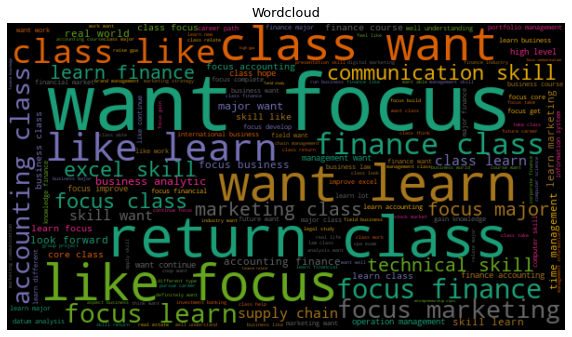

In [163]:
from wordcloud import WordCloud
from textwrap import wrap

def generate_wordcloud(data,title):
  wc = WordCloud(width=600, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
    
generate_wordcloud(data = df_dtm_2.sum(axis=1).to_dict(), title = "Wordcloud")

## Word cloud (Three-word)

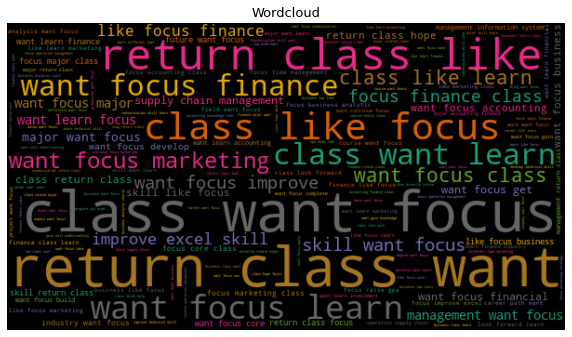

In [164]:
from wordcloud import WordCloud
from textwrap import wrap

def generate_wordcloud(data,title):
  wc = WordCloud(width=600, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
    
generate_wordcloud(data = df_dtm_3.sum(axis=1).to_dict(), title = "Wordcloud")

In [165]:
df_dtm_1


,word,frequency
0,ability,22
1,able,53
2,abroad,3
3,absence,1
4,absorb,2
...,...,...
1614,write,8
1615,writing,14
1616,written,1
1617,year,25


## Word frequency bar chart (One-word)

/var/folders/f3/7kkx3wss44154l_sc0vszfkc0000gn/T/ipykernel_54830/708389207.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  word_freqs_1 = df_dtm_1.sum(axis=1).sort_values(ascending=False)[:30].to_dict()
/var/folders/f3/7kkx3wss44154l_sc0vszfkc0000gn/T/ipykernel_54830/708389207.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  word_freqs_1 = df_dtm_1.sum(axis=1).sort_values(ascending=False)[:30].to_dict()


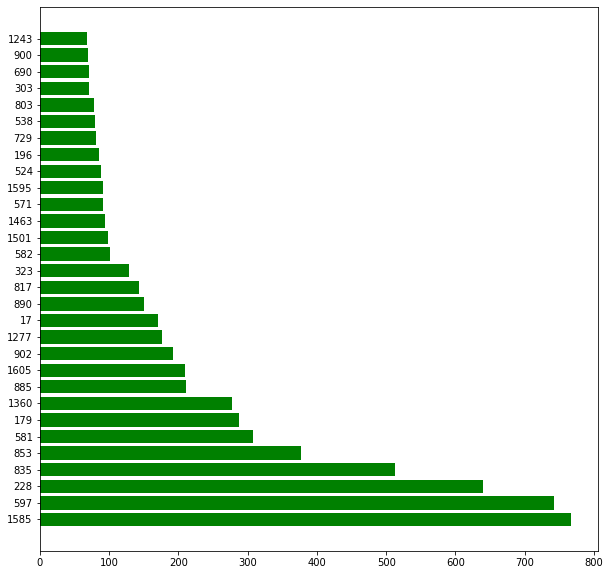

In [166]:
import matplotlib.pyplot as plt


word_freqs_1 = df_dtm_1.sum(axis=1).sort_values(ascending=False)[:30].to_dict()



plt.figure(figsize = (10, 10))
plt.barh(range(len(word_freqs_1)), word_freqs_1.values(),color='green')

plt.yticks(range(len(word_freqs_1)), word_freqs_1.keys())
plt.yticks(rotation = 0)


plt.show()

## Word frequency bar chart (Two-word)

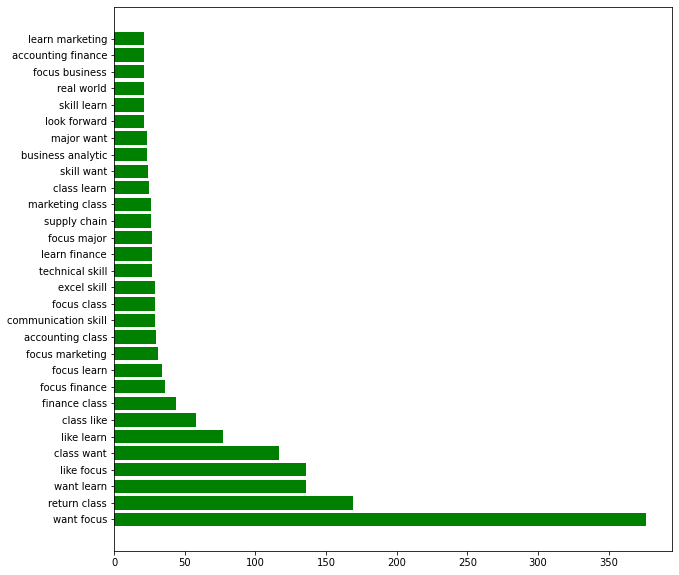

In [167]:
import matplotlib.pyplot as plt


word_freqs_1 = df_dtm_2.sum(axis=1).sort_values(ascending=False)[:30].to_dict()



plt.figure(figsize = (10, 10))
plt.barh(range(len(word_freqs_1)), word_freqs_1.values(),color='green')

plt.yticks(range(len(word_freqs_1)), word_freqs_1.keys())
plt.yticks(rotation = 0)


plt.show()

## Word frequency bar chart (Three-word)

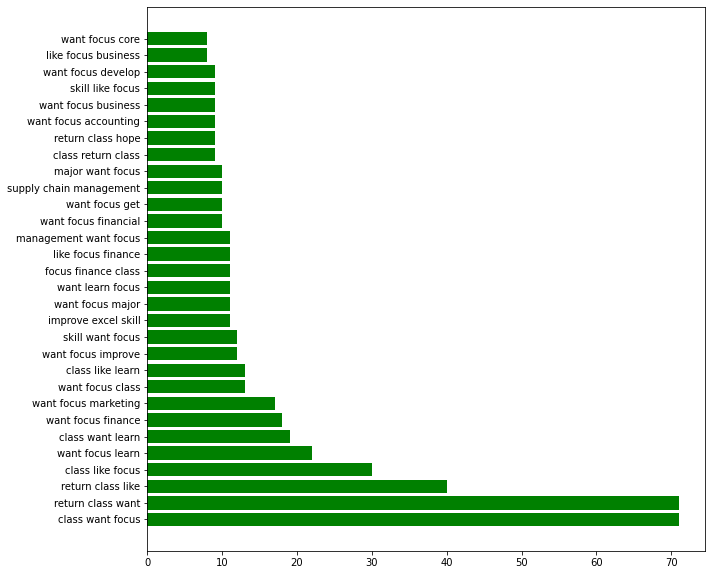

In [168]:
import matplotlib.pyplot as plt


word_freqs_1 = df_dtm_3.sum(axis=1).sort_values(ascending=False)[:30].to_dict()



plt.figure(figsize = (10, 10))
plt.barh(range(len(word_freqs_1)), word_freqs_1.values(),color='green')

plt.yticks(range(len(word_freqs_1)), word_freqs_1.keys())
plt.yticks(rotation = 0)


plt.show()